In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('./data/all_sites_scores.csv')
df2 = pd.read_csv('./data/fandango_scrape.csv')
df1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [4]:
df2.head()
# df2.info()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

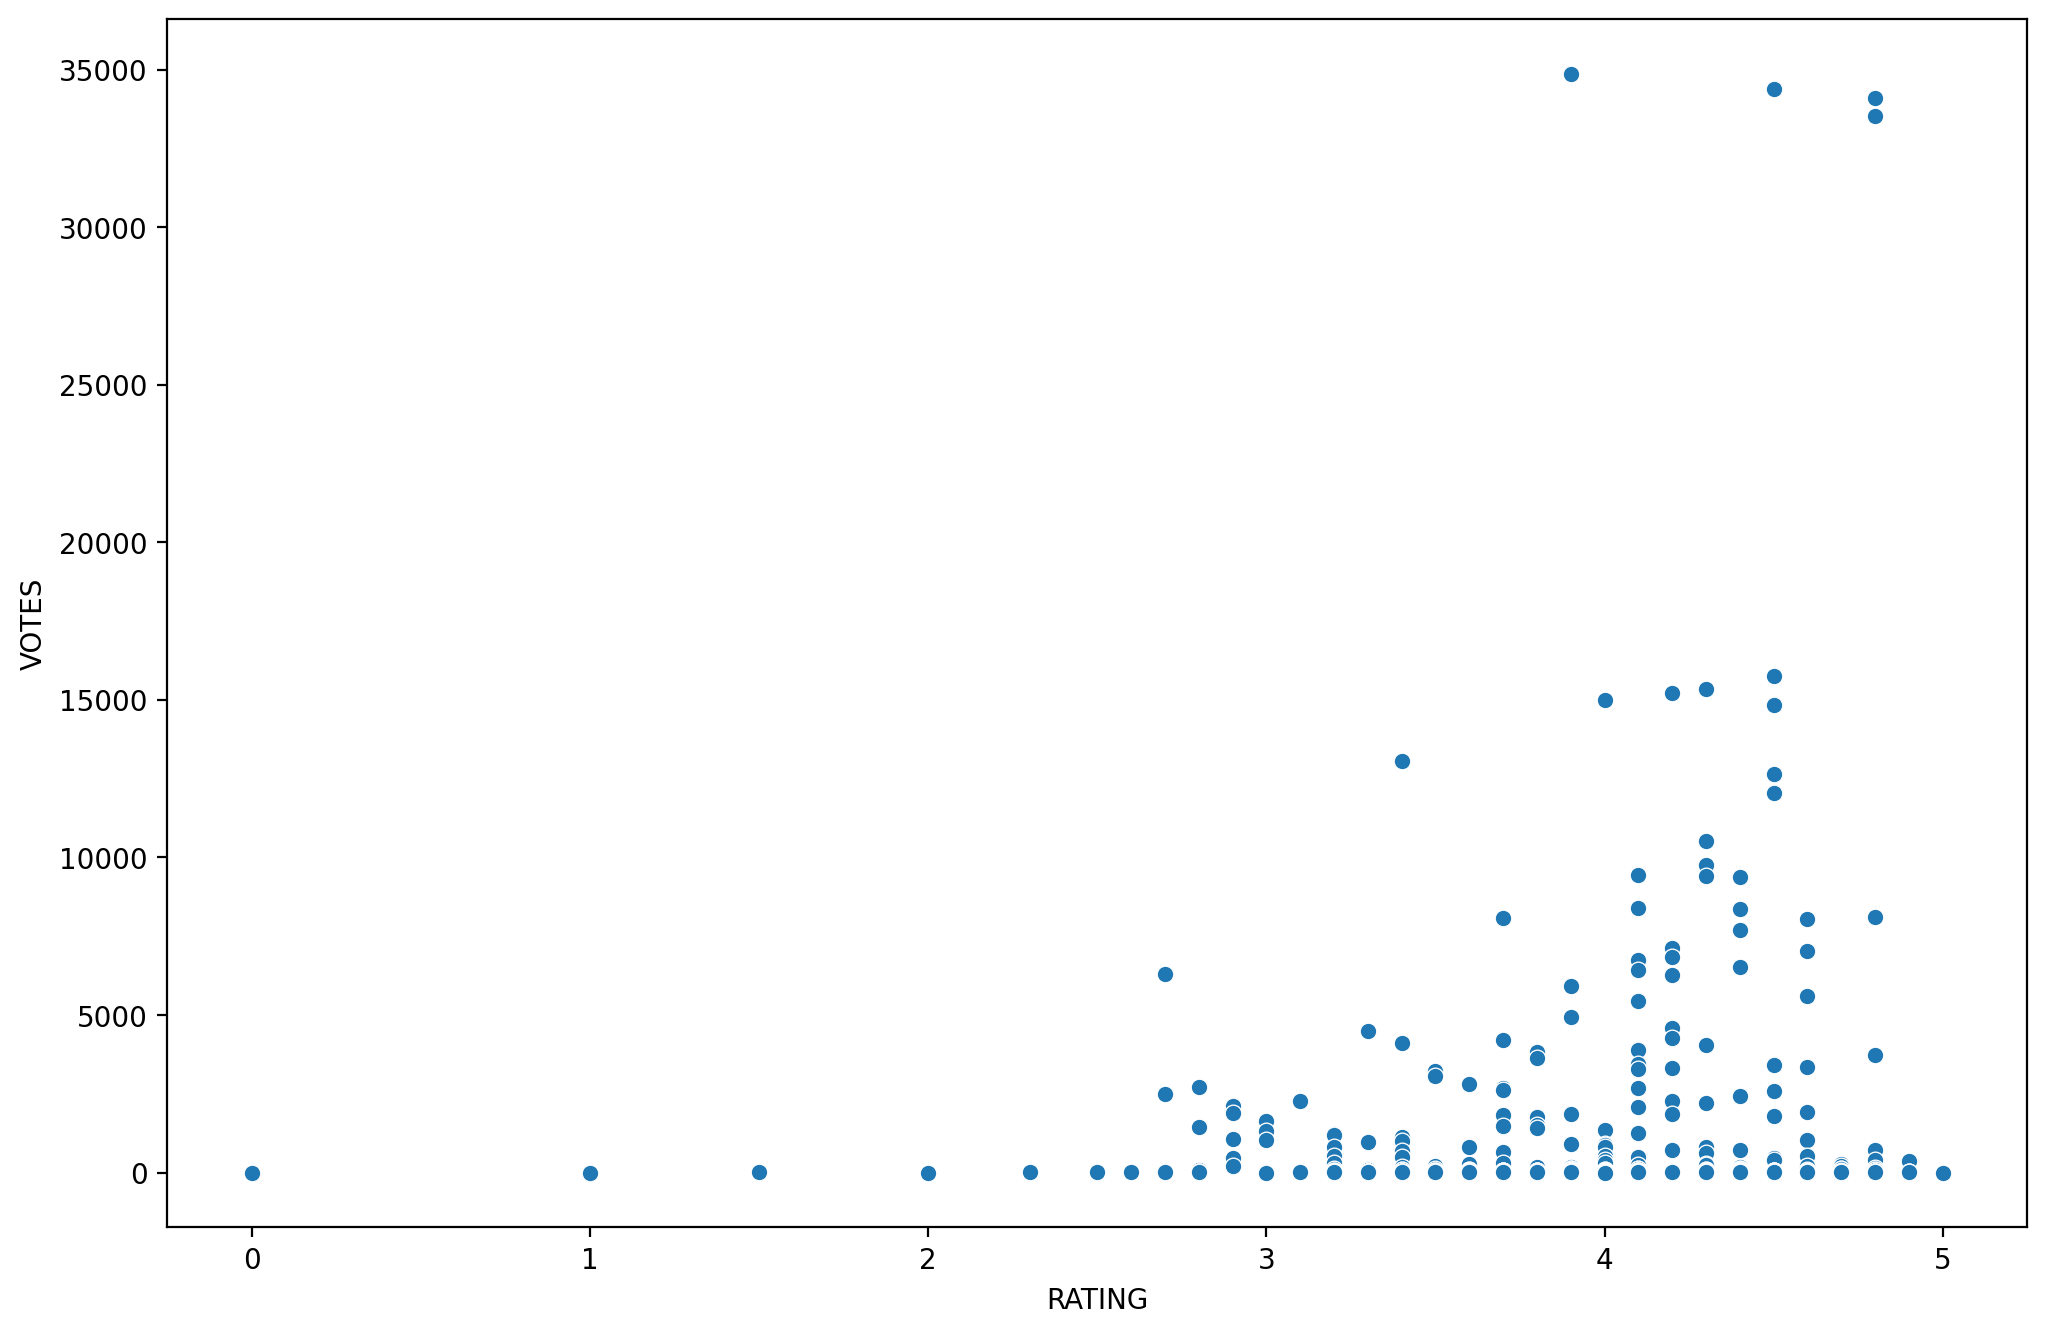

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df2,y='VOTES',x='RATING')

In [6]:
# calculate correlation
df2.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [7]:
# title
df2['YEAR'] = df2['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))
df2

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [8]:
df2['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

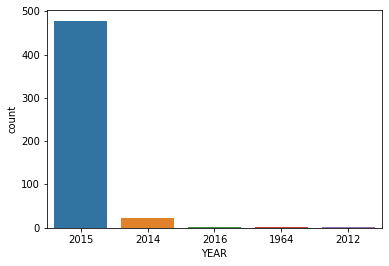

In [9]:
sns.countplot(data=df2,x='YEAR')

In [10]:
df2.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [11]:
no = df2['VOTES'] == 0
no.sum()

69

In [12]:
reviwed = df2[df2['VOTES'] > 0 ]
reviwed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


<AxesSubplot:xlabel='RATING', ylabel='Density'>

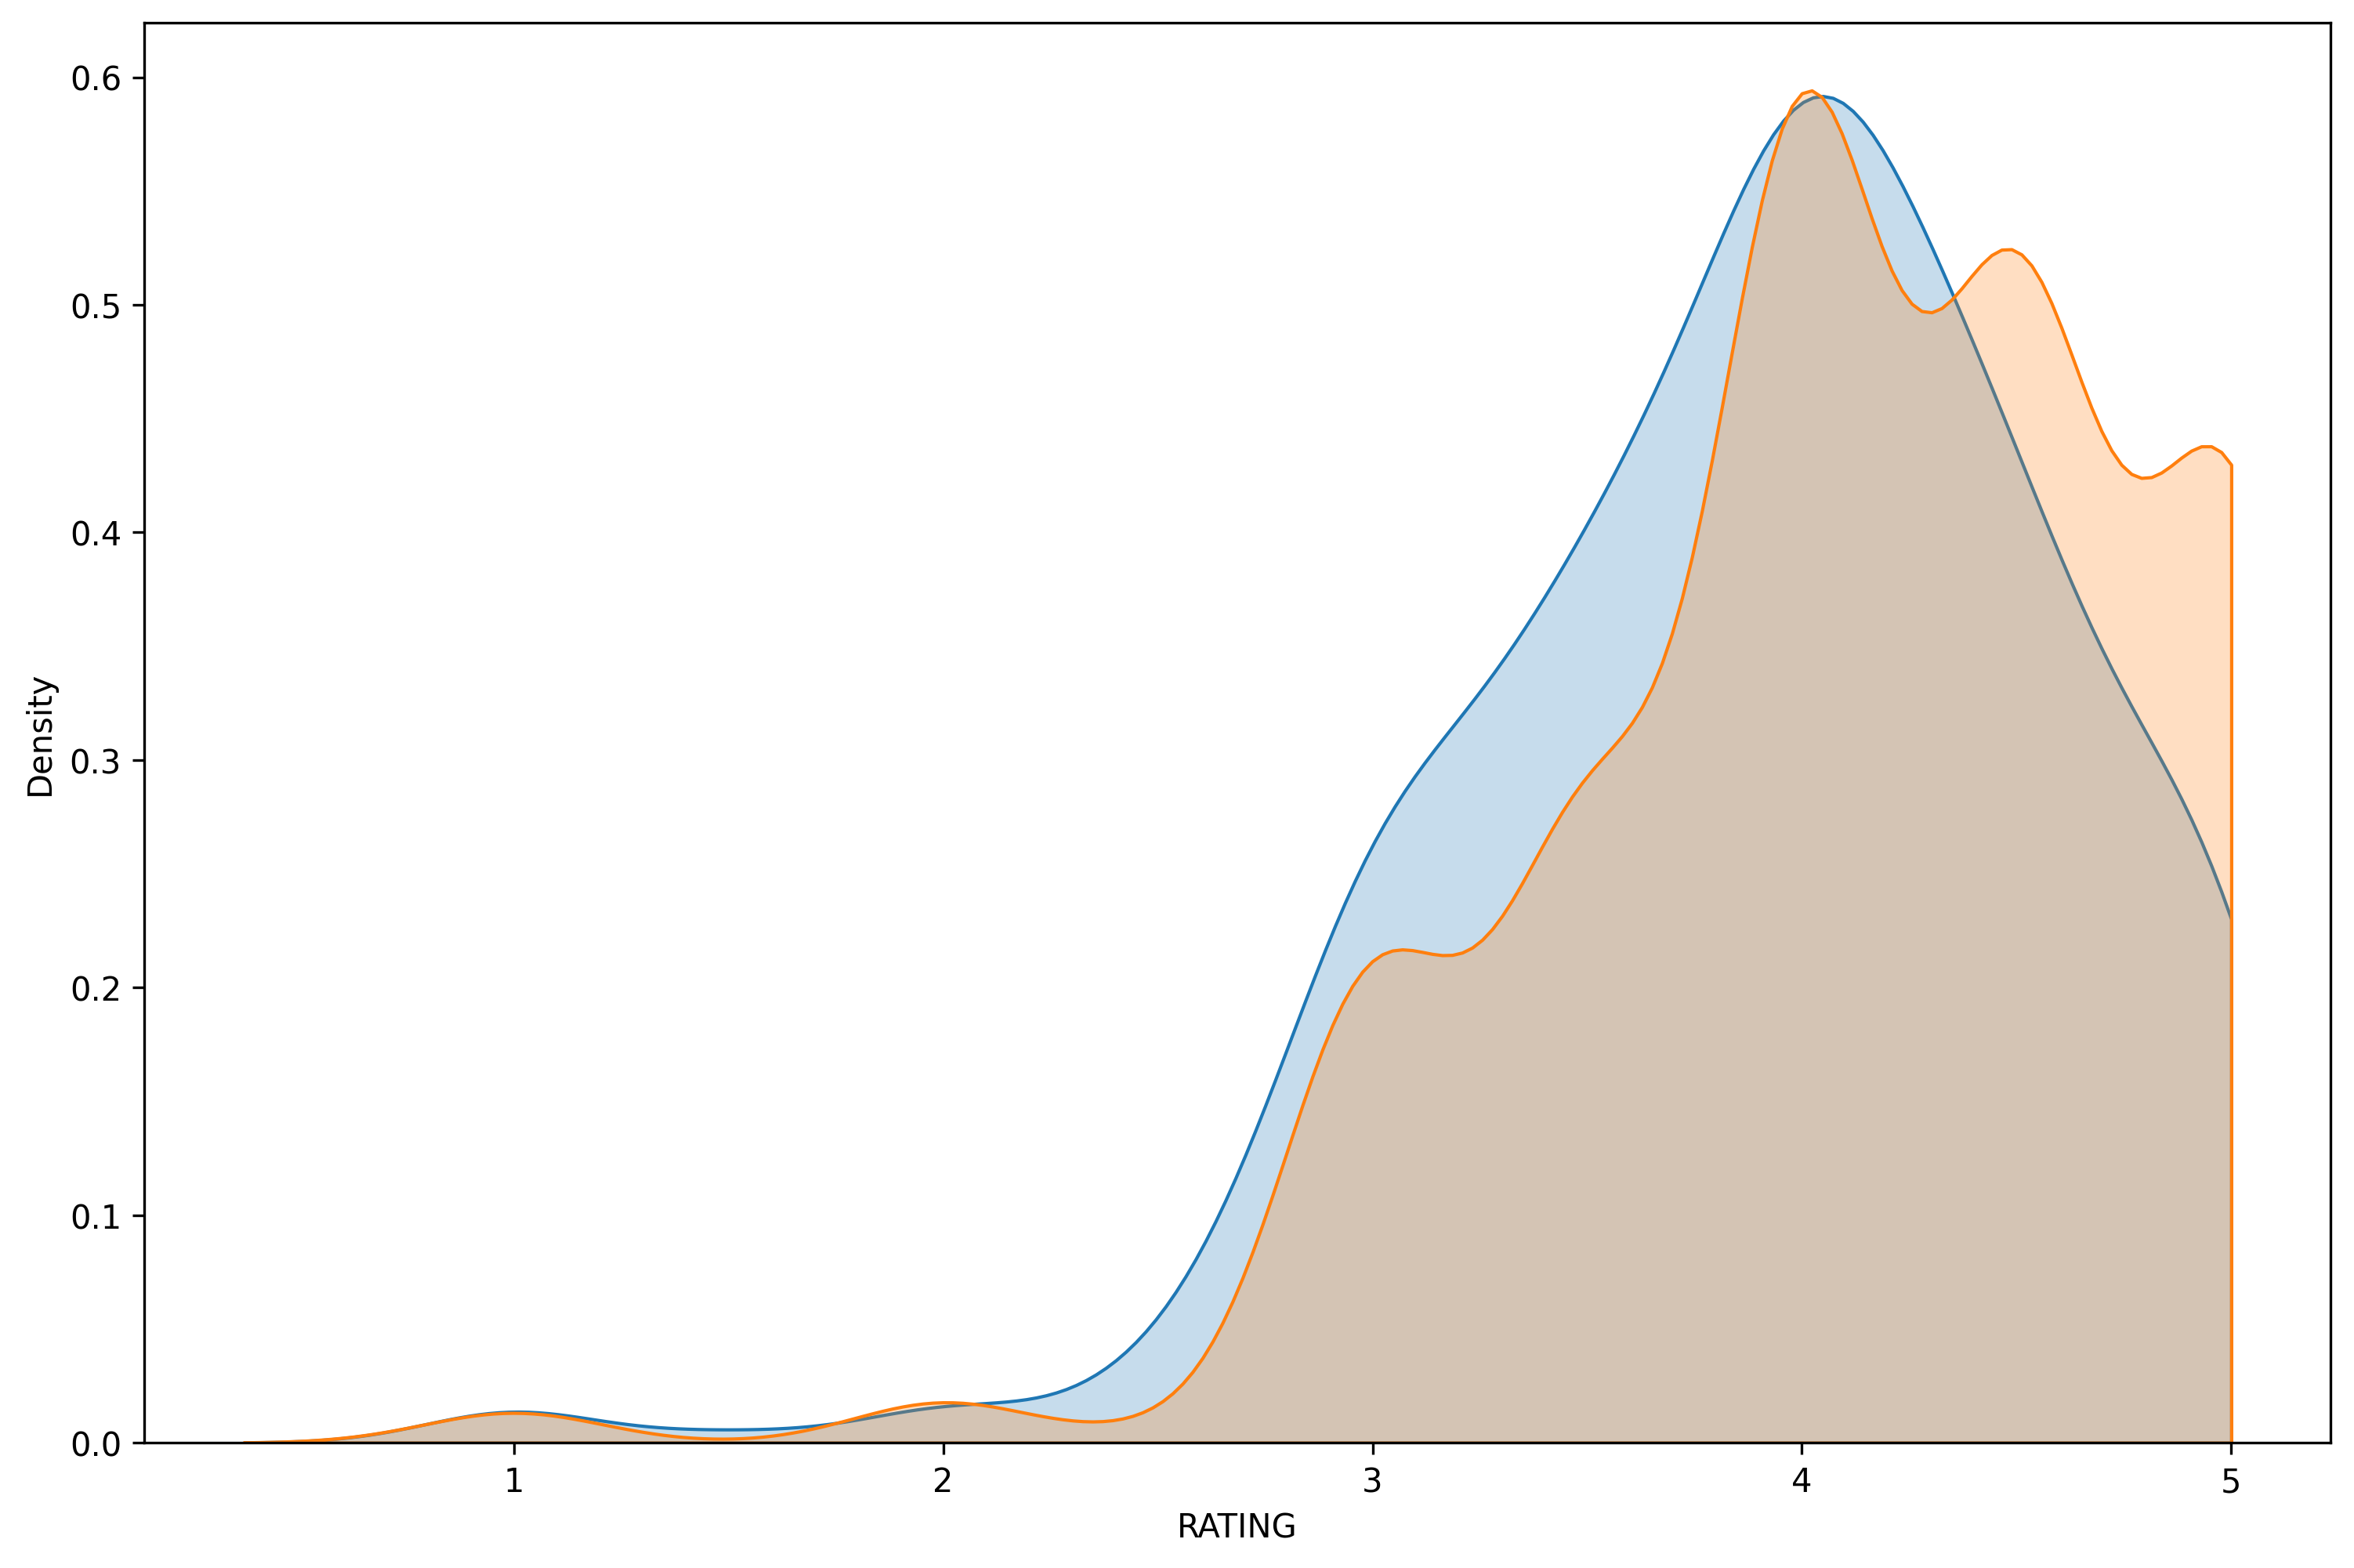

In [13]:
plt.figure(figsize=(12,8),dpi=300)
sns.kdeplot(data=reviwed,x='RATING',clip=[0,5],fill=True,label=True)
sns.kdeplot(data=reviwed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

In [14]:
reviwed['STARS_DIFF'] = reviwed['STARS'] - reviwed['RATING']
reviwed['STARS_DIFF'] = reviwed['STARS_DIFF'].round(2)

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_10180\2422535391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviwed['STARS_DIFF'] = reviwed['STARS'] - reviwed['RATING']
C:\Users\CHARLES\AppData\Local\Temp\ipykernel_10180\2422535391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviwed['STARS_DIFF'] = reviwed['STARS_DIFF'].round(2)


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

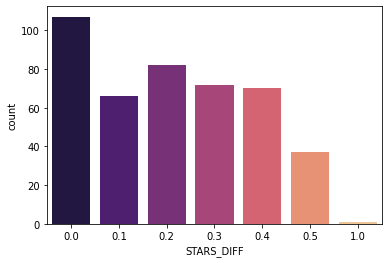

In [15]:
sns.countplot(data=reviwed,x='STARS_DIFF',palette='magma')

In [17]:
df1.head()
df1.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

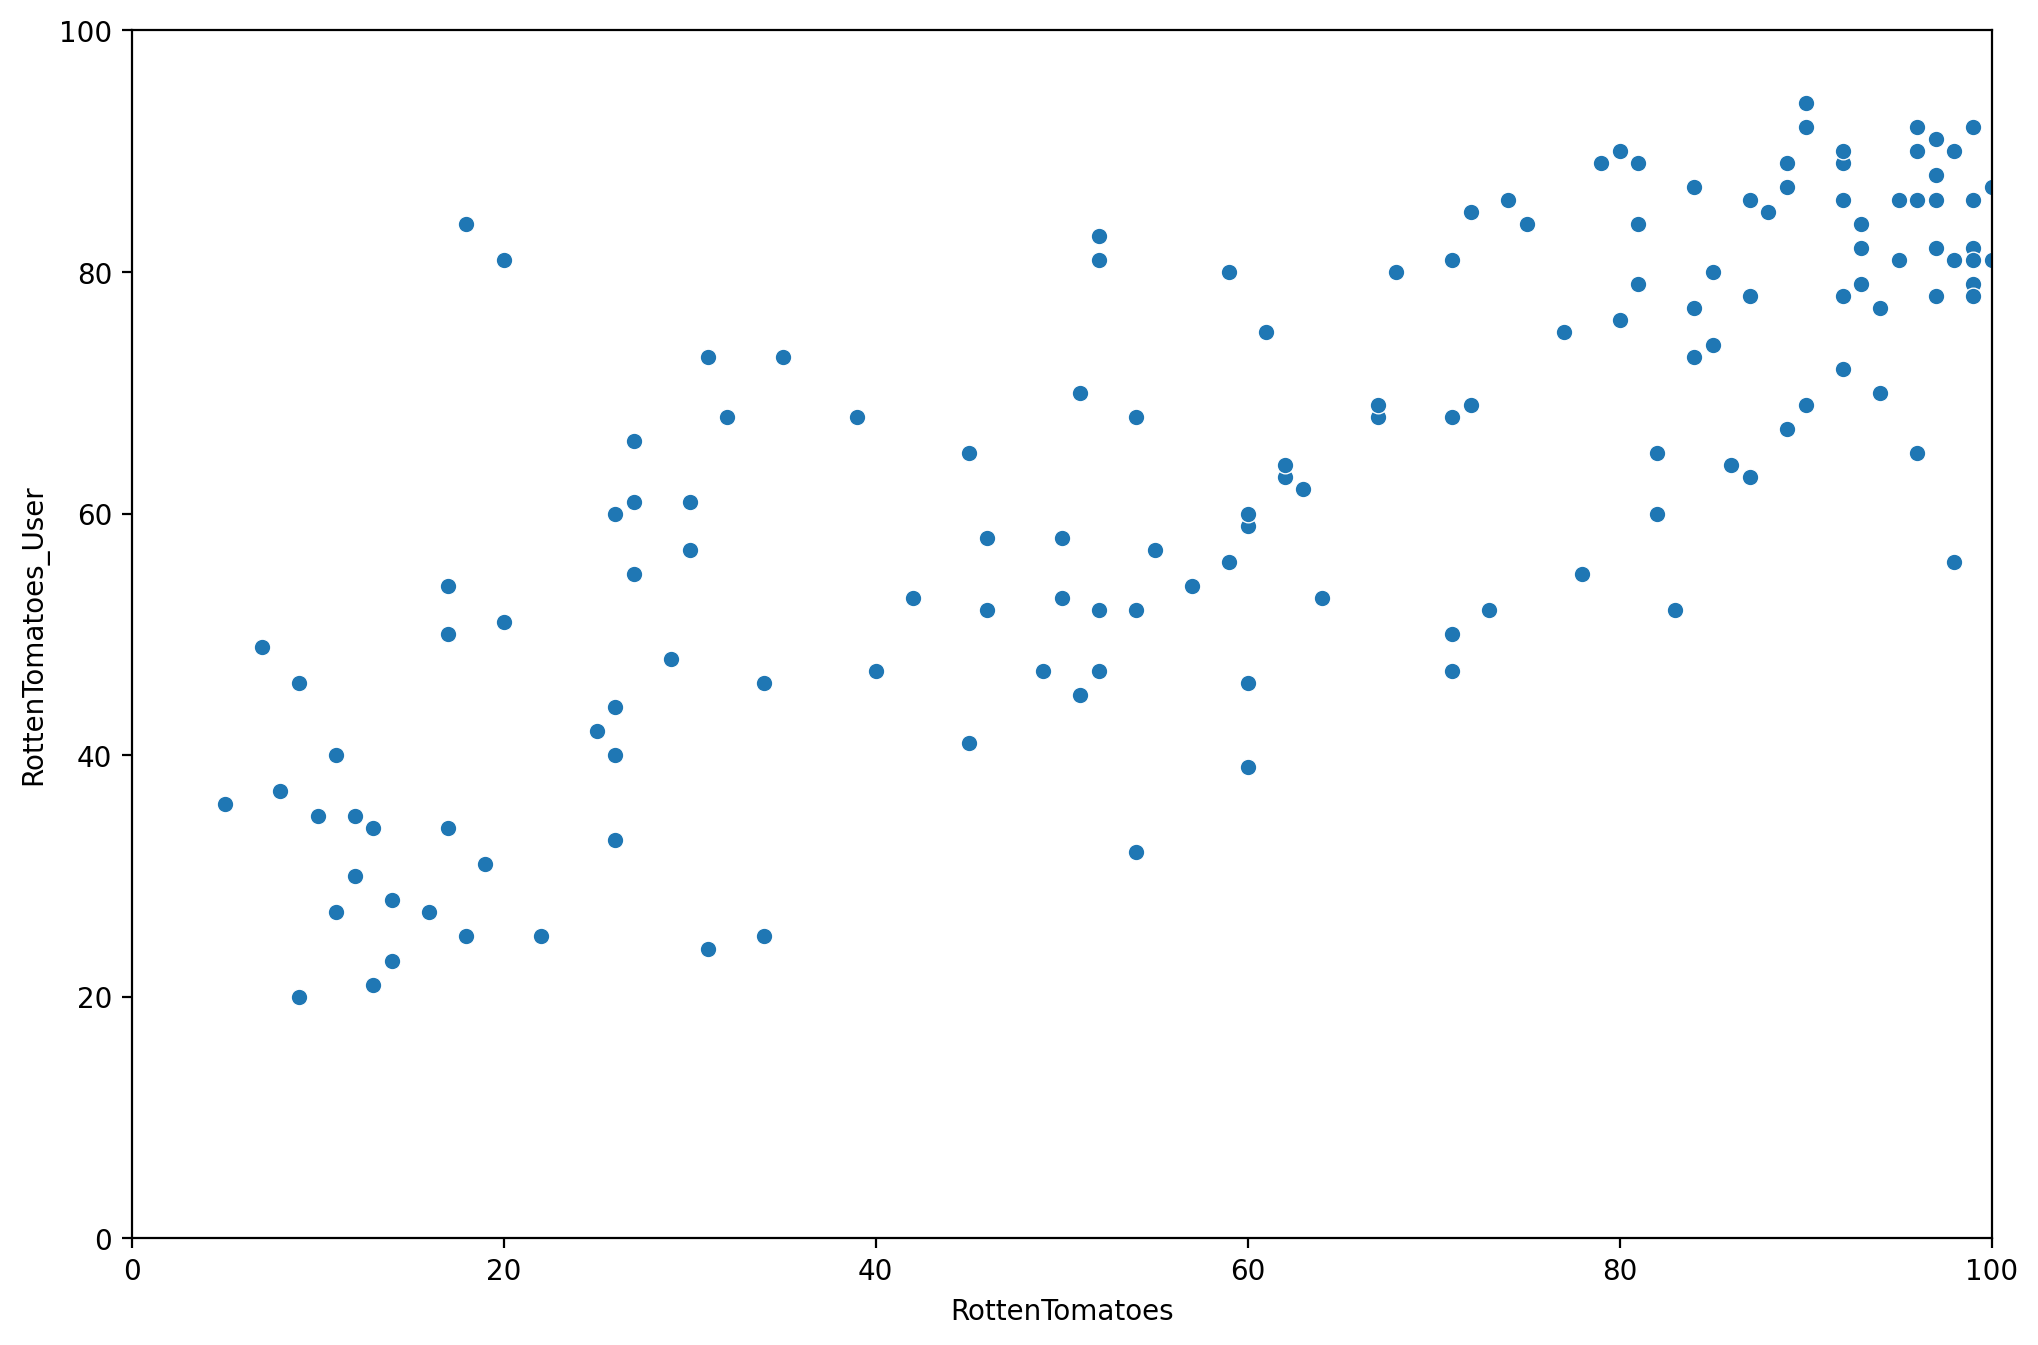

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df1,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [23]:
df1['DIFF'] = df1['RottenTomatoes'] - df1['RottenTomatoes_User']
df1['DIFF'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='DIFF', ylabel='Count'>

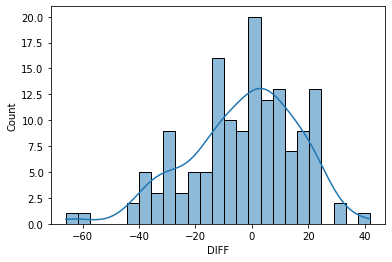

In [25]:
sns.histplot(data=df1,x='DIFF',bins=25,kde=True)

In [28]:
df1.nsmallest(5,'DIFF')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [29]:
df1.nlargest(5,'DIFF')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 100.0)

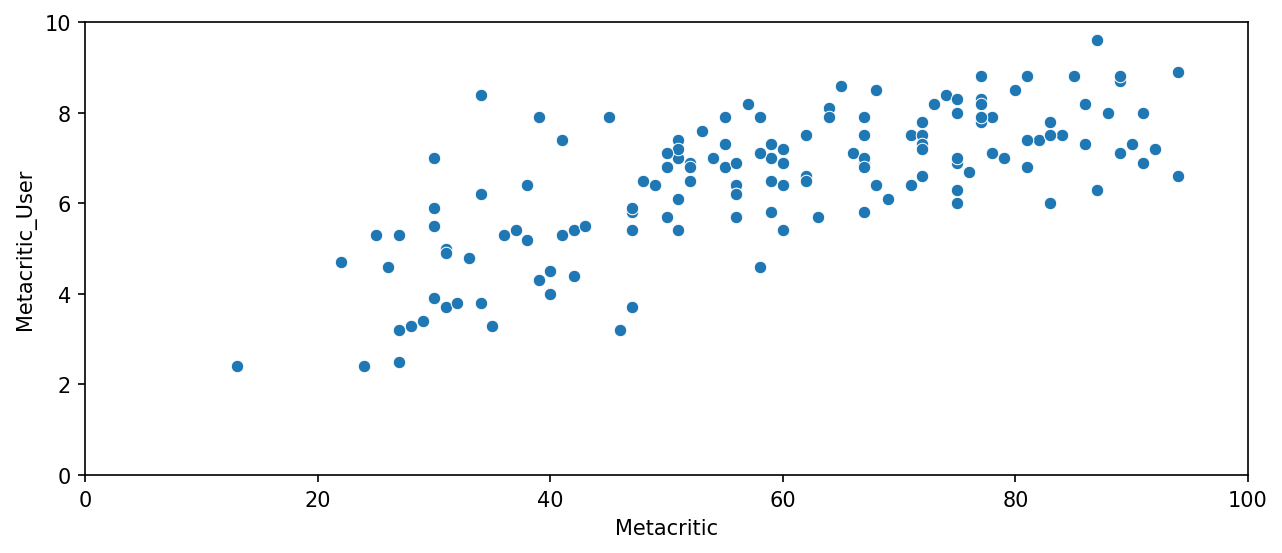

In [34]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

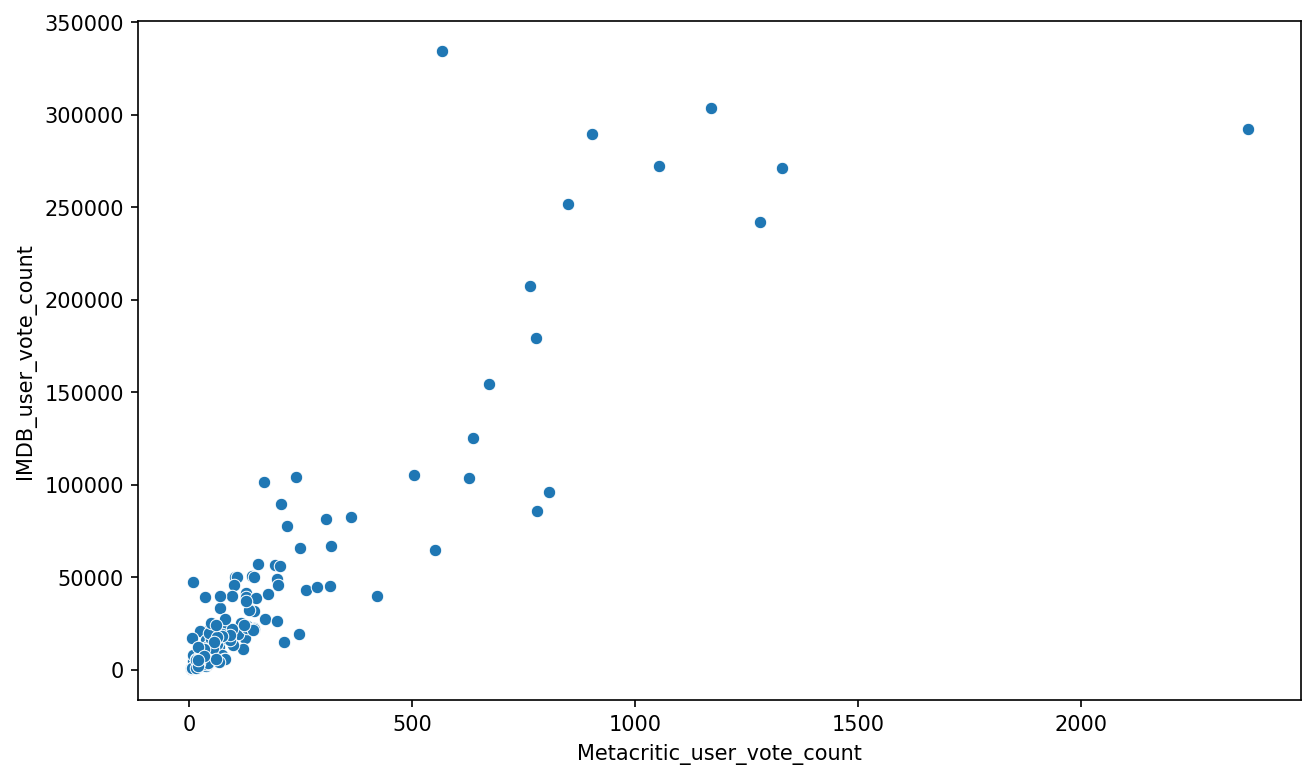

In [37]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df1,x='Metacritic_user_vote_count',y='IMDB_user_vote_count',)
# plt.ylim(0,100)
# plt.xlim(0,100)

In [38]:
df1.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [39]:
df1.nlargest(1,'Metacritic_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
